# **BLACK-SCHOLES MODEL**
[Black-Scholes model basics](https://www.investopedia.com/terms/b/blackscholes.asp)

**IMPORTING THE LIBRARIES**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date

import warnings
warnings.filterwarnings("ignore")

# to fetch data
import yfinance as yf

import scipy.stats as ss

**IMPORTING DATA**

In [6]:
symbol = '^SPX'
end = date.today()
start = end.replace(year = 2022)

tickerData = yf.Ticker(symbol)

# Read data
df = tickerData.history(period='1d', start=start, end=end, interval = '1d')


df.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-22 00:00:00-04:00,5242.479980,5246.089844,5229.870117,5234.180176,3374700000,0.0,0.0
2024-03-25 00:00:00-04:00,5219.520020,5229.089844,5216.089844,5218.189941,3331360000,0.0,0.0
2024-03-26 00:00:00-04:00,5228.850098,5235.160156,5203.419922,5203.580078,3871790000,0.0,0.0
2024-03-27 00:00:00-04:00,5226.310059,5249.259766,5213.919922,5248.490234,3850500000,0.0,0.0
2024-03-28 00:00:00-04:00,5248.029785,5264.850098,5245.819824,5254.350098,3998270000,0.0,0.0


In [7]:
symbol = '^SPX'  #the ticker of the stock whose data is to be taken out
dfo = yf.Ticker(symbol)

In [47]:
dfo.options  #to get the date of different expiration time

('2024-04-01',
 '2024-04-02',
 '2024-04-03',
 '2024-04-04',
 '2024-04-05',
 '2024-04-08',
 '2024-04-09',
 '2024-04-10',
 '2024-04-11',
 '2024-04-12',
 '2024-04-15',
 '2024-04-16',
 '2024-04-17',
 '2024-04-18',
 '2024-04-19',
 '2024-04-22',
 '2024-04-23',
 '2024-04-24',
 '2024-04-25',
 '2024-04-26',
 '2024-04-29',
 '2024-04-30',
 '2024-05-01',
 '2024-05-02',
 '2024-05-03',
 '2024-05-06',
 '2024-05-10',
 '2024-05-17',
 '2024-05-31',
 '2024-06-21',
 '2024-06-28',
 '2024-07-19',
 '2024-07-31',
 '2024-08-16',
 '2024-08-30',
 '2024-09-20',
 '2024-09-30',
 '2024-10-18',
 '2024-11-15',
 '2024-12-20',
 '2024-12-31',
 '2025-01-17',
 '2025-02-21',
 '2025-03-21',
 '2025-03-31',
 '2025-04-17',
 '2025-06-20',
 '2025-12-19',
 '2026-03-20',
 '2026-12-18',
 '2027-12-17',
 '2028-12-15',
 '2029-12-21')

In [49]:
dfo_exp = dfo.option_chain(dfo.options[1])  #you can change index to try on different expiry dates

In [ ]:
dfo_exp.calls.head() #data for call options

# **CALCULATION OF ANNUAL VOLATALITY**
Annual volatility of the stock can be calculated as:

Calculating daily logarithmic returns

Then calculating its standard deviation to get daily volatility

Then multiplying it by sqrt(252) as there are 252 trading days in a year.

In [11]:
def annual_vol(df):
    """
    Function to calculate annual volatility

    Parameters
    ----------
    df : dataframe
         Stock info

    Returns
    -------
    vol : float
        annual volatility of the stock
    """
    df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))
    log_return = df['Log_Return']
    log_return =df['Log_Return'].dropna() #your code here  #to remove nan
    daily_vol = np.std(log_return) #your code here
    vol = daily_vol*(252**0.5) #your code here

    return vol

In [12]:
vol = annual_vol(df)
vol

0.18391754338190472

# **BLACK-SCHOLES MODEL**


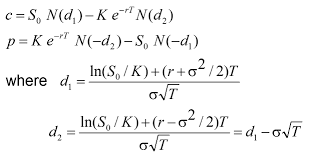

C : call option price

P : Put option price

S : Stock price

K : Strike price

r : risk free rate

t : time of maturity in year

N = Normal distribution

In [13]:
from scipy.stats import norm
def euro_vanilla(S, K, T, r, sigma, option):
    """
    To calculate options price with the help of black-scholes model

    Parameters
    ----------
    S : float
        The price of the underlying

    K : float
        Strike price of the option

    T : float
        Time to expiry in years

    r : float
        Risk free rate which can be taken as the US Treasury bond yield

    sigma : float
        The annual volatility of the returns

    option : string
        call for call option
        put for put option

    Returns
    -------
    premium : float
        The price of call or put option
    """


   #your code here

    d1=(np.log(S/K)+(r+(sigma**2)/2)*T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    #n1= 0.5 * (1 + np.sign(d1) * np.math.erf(abs(d1) / np.sqrt(2)))
    #n2= 0.5 * (1 + np.sign(d2) * np.math.erf(abs(d2) / np.sqrt(2)))
    #n11= 0.5 * (1 + np.sign(-d1) * np.math.erf(abs(d1) / np.sqrt(2)))
    #n22= 0.5 * (1 + np.sign(-d2) * np.math.erf(abs(d2) / np.sqrt(2)))
    if option=='call':
      premium=S*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2)
    elif option=='put':
      premium=-S*norm.cdf(-d1)+K*np.exp(-r*T)*norm.cdf(-d2)
    else:
        raise ValueError("Option type must be either 'call' or 'put'.")
    return premium



In [62]:
#Calculate the number of days left for expiry from your calculation in years
T = 3/365 # No. of days / 365

In [63]:
#r is the risk free rate taken from the 10 years us treasury bond
#call price calculated from black scholes model
call = {}
for K in dfo_exp.calls['strike']:
    call_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0424, sigma=vol,option='call')
  # print(call_price)
    call[K] = call_price
th_call = pd.DataFrame.from_dict(call, orient='index')
th_call.rename(columns = {0:"th_call"}, inplace = True)
th_call.head()

,th_call
4000.0,1255.743827
4100.0,1155.778671
4300.0,955.848357
4450.0,805.900622
4625.0,630.961598


In [64]:
#actual call price
ac_call = dfo_exp.calls.loc[:, ['strike', 'lastPrice']]
ac_call.set_index('strike', inplace = True)
ac_call.rename(columns = {"lastPrice":"ac_call"}, inplace=True)
ac_call.head()

,ac_call
strike,
4000.0,1181.22
4100.0,1120.97
4300.0,919.00
4450.0,665.35
4625.0,598.40


In [65]:
call = th_call
call["ac_call"] = ac_call
call.head(10)

,th_call,ac_call
4000.0,1255.743827,1181.22
4100.0,1155.778671,1120.97
4300.0,955.848357,919.00
4450.0,805.900622,665.35
4625.0,630.961598,598.40
4650.0,605.970308,578.80
4700.0,555.987730,557.44
4750.0,506.005152,513.45
4800.0,456.022574,463.65
4810.0,446.026058,414.86


<Axes: >

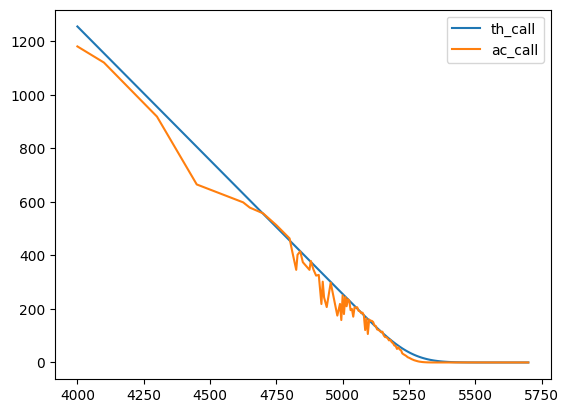

In [66]:
call.plot() #plotting the actual and theoretical call prices

In [71]:
#r is the risk free rate taken from the 10 years us treasury bond
#theoretical put price calculated from black scholes model
put = {}
for K in dfo_exp.puts['strike']:
    put_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0424, sigma=vol, option = 'put')
  # print(put_price)
    put[K] = put_price
th_put = pd.DataFrame.from_dict(put, orient='index')
th_put.rename(columns = {0:"th_put"}, inplace = True)
th_put.head()

,th_put
2000.0,0.000000e+00
2200.0,0.000000e+00
2400.0,0.000000e+00
2800.0,0.000000e+00
3000.0,5.438837e-248


In [68]:
#actual put price
ac_put = dfo_exp.puts.loc[:, ['strike', 'lastPrice']]
ac_put.set_index('strike', inplace = True)
ac_put.rename(columns = {"lastPrice":"ac_put"}, inplace=True)
ac_put.head()

,ac_put
strike,
2000.0,0.05
2200.0,0.07
2400.0,0.07
2800.0,0.05
3000.0,0.05


In [69]:
put = th_put
put["ac_put"] = ac_put
put.tail(10)

,th_put,ac_put
5320.0,75.889784,69.11
5325.0,79.770602,62.62
5330.0,83.733702,68.63
5335.0,87.775316,101.85
5340.0,91.891615,86.15
5345.0,96.078736,86.70
5350.0,100.332809,94.90
5365.0,113.458402,120.40
5370.0,117.942224,112.60
5400.0,145.741786,140.90


<Axes: >

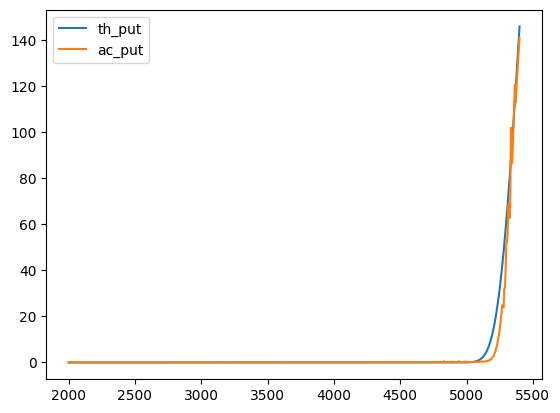

In [70]:
put.plot()